In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

In [2]:
R = 4.5 # m
D_q4 = 1.7 # 螺距 m
v_q4 = 1 # 龙头速度 m/s

theta0 = 2 * np.pi * R / D_q4
print(f"theta0 = {theta0 / (np.pi)} * pi")
k = (np.sin(theta0) + theta0 * np.cos(theta0)) / (np.cos(theta0) - theta0 * np.sin(theta0))
print(f"k = {k}")

x0 = R * np.cos(theta0)
y0 = R * np.sin(theta0)

x0_ = -x0
y0_ = -y0

print(f"(x0, y0) = ({x0}, {y0})")

theta0 = 5.294117647058823 * pi
k = -0.8540686593465319
(x0, y0) = (-2.7118558637066594, -3.591077522761074)


In [3]:
A = np.array([[R * np.cos(theta0), R * np.sin(theta0)],
             [1, k]])

b = np.array([0, k * R * np.sin(theta0) + R * np.cos(theta0)])

x3, y3 = np.linalg.solve(A, b)

print(f"(x3, y3) = ({x3}, {y3})")


(x3, y3) = (0.21591425687003532, -0.16305087813884775)


In [4]:
x1 = 1.0 / 3.0 * x0 + 2.0 / 3.0 * x3
y1 = 1.0 / 3.0 * y0 + 2.0 / 3.0 * y3

print(f"(x1, y1) = ({x1}, {y1})")

(x1, y1) = (-0.7600091166555296, -1.3057264263462562)


In [5]:
x2 = - x0 + (x1 - x3)
y2 = - y0 + (y1 - y3)

print(f"(x2, y2) = ({x2}, {y2})")

(x2, y2) = (1.7359324901810944, 2.4484019745536654)


In [6]:
r2 = np.sqrt((x1 - x3) ** 2 + (y1 - y3) ** 2)
r1 = 2 * r2

print(f"r2 = {r2}, r1 = {r1}")

r2 = 1.5027088338945176, r1 = 3.005417667789035


In [7]:
xt = 2.0 / 3.0 * x2 + 1.0 / 3.0 * x1
yt = 2.0 / 3.0 * y2 + 1.0 / 3.0 * y1

print(f"tangent_point = ({xt}, {yt})")


tangent_point = (0.9039519545688863, 1.1970258409203582)


In [8]:
def arctan3(y, x):
    ret0 = np.arctan2(y, x)
    if ret0 < 0:
        return ret0 + 2 * np.pi
    else:
        return ret0

theta_11 = arctan3(yt - y1, xt - x1)
theta_12 = arctan3(y0 - y1, x0 - x1)
    
theta_21 = np.arctan2(yt - y2, xt - x2)
theta_22 = np.arctan2(y0_ - y2, x0_ - x2)

In [9]:
w1 = v_q4 / r1 # 第二段圆弧的角速度
w2 = v_q4 / r2 # 第一段圆弧的角速度
t1 = (theta_12 - theta_11) / w1 # 离开第一段圆弧的时刻
t2 = t1 + (theta_22 - theta_21) / w2 # 离开第二段圆弧的时刻

In [10]:
def theta_t_q4(theta):
    return -1/2 * np.log(np.sqrt(1 + theta**2) - theta) + 1/2 * theta * np.sqrt(theta ** 2 + 1)

C_q4_0 = theta_t_q4(theta0) * D_q4 / (2*math.pi) # 积分常数，不要动
C_q4_3 = - theta_t_q4(theta0 + np.pi) * D_q4 / (2*math.pi) + v_q4 * t2

def equ_q4_0(theta, t):
    return - theta_t_q4(theta) * D_q4 / (2 * math.pi) - v_q4 * t + C_q4_0

def equ_q4_3(theta, t):
    return theta_t_q4(theta) * D_q4 / (2 * math.pi) - v_q4 * t + C_q4_3

def rho_q4_0(theta): # 极坐标进入路线方程
    return D_q4 / (2 * np.pi) * theta

def rho_q4_3(theta) :
    return D_q4 / (2 * np.pi) * (theta - np.pi)

def t_to_theta_q4_0(t):
    initial = 0.0
    return fsolve(equ_q4_0, initial, args=(t))

def t_to_theta_q4_1(t):
    x = x1 + r1 * np.cos(theta_12 - w1 * t) # 顺时针旋转，角速度为负
    y = y1 + r1 * np.sin(theta_12 - w1 * t)
    return x, y

def t_to_theta_q4_2(t):
    x = x2 + r2 * np.cos(theta_21 + w2 * (t - t1))
    y = y2 + r2 * np.sin(theta_21 + w2 * (t - t1))
    return x, y

def t_to_theta_q4_3(t):
    initial = 0.0
    return fsolve(equ_q4_3, initial, args=(t))

def t_to_xy_q4(t):
    if t < 0 :
        angle = t_to_theta_q4_0(t)
        rho = rho_q4_0(angle)
        x = rho * np.cos(angle)
        y = rho * np.sin(angle)
        return x, y
    elif t < t1:
        return t_to_theta_q4_1(t)
    elif t < t2:
        return t_to_theta_q4_2(t)
    else:
        angle = t_to_theta_q4_3(t)
        rho = rho_q4_3(angle)
        x = rho * np.cos(angle)
        y = rho * np.sin(angle)
        return x, y
    
print(t_to_xy_q4(-0.1))

(array([-2.63509855]), array([-3.65517044]))


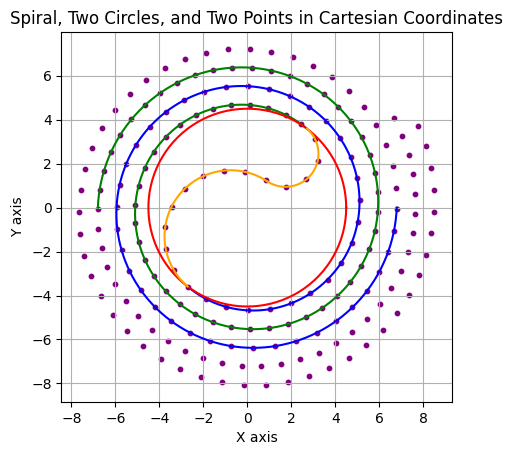

In [11]:
# 定义等距螺线的角度范围
theta_spiral = np.linspace(theta0, 8 * np.pi, 1000)
rho_spiral = (1.7 / (2 * np.pi)) * theta_spiral
x_spiral = rho_spiral * np.cos(theta_spiral)
y_spiral = rho_spiral * np.sin(theta_spiral)

theta_spiral_ = np.linspace(theta0 - np.pi, 7 * np.pi, 1000)
rho_spiral_ = (1.7 / (2 * np.pi)) * (theta_spiral_ + np.pi)
x_spiral_ = rho_spiral_ * np.cos(theta_spiral_)
y_spiral_ = rho_spiral_ * np.sin(theta_spiral_)

# 圆的半径
r = 4.5
theta_circle = np.linspace(0, 2 * np.pi, 100)
x_circle = r * np.cos(theta_circle)
y_circle = r * np.sin(theta_circle)

# 圆心的半径
theta_circle1 = np.linspace(theta_21, theta_22, 1000)
x_circle1 = (r2 * np.cos(theta_circle1)) + x2
y_circle1 = (r2 * np.sin(theta_circle1)) + y2
theta_circle2 = np.linspace(theta_11, theta_12, 1000)
x_circle2 = (r1 * np.cos(theta_circle2)) + x1
y_circle2 = (r1 * np.sin(theta_circle2)) + y1

# 创建图形和坐标轴
fig, ax = plt.subplots()

# 绘制等距螺线
ax.plot(x_spiral, y_spiral, 'b', label='Spiral')
ax.plot(x_spiral_, y_spiral_, 'g', label='Spiral')

# 绘制以原点为中心的圆
ax.plot(x_circle, y_circle, 'r', label='Circle with radius 4.5')

# 绘制以(x1, y1)为圆心的圆
ax.plot(x_circle1, y_circle1, 'orange', label='Circle centered at (x2, y2)')
ax.plot(x_circle2, y_circle2, 'orange', label='Circle centered at (x1, y1)')

# 绘制两个点
# ax.scatter([x3, x1], [y3, y1], color=['green', 'purple'], s=100, label=['Point (x3, y3)', 'Point (x1, y1)'])
# ax.scatter([xt], [yt], color=['green'], s=10, label=['(xt, yt)'])
# ax.scatter([x1], [y1], color=['green'], s=10, label=['(x1, y1)'])
# ax.scatter([x2], [y2], color=['green'], s=10, label=['(x2, y2)'])
for dt in range(-100, 100, 1):
    x, y = t_to_xy_q4(dt)
    # print(f"x = {x}, y = {y}")
    ax.scatter([x], [y], s=10, color = ["purple"])

# 添加图例
# ax.legend()

# 设置图表标题和显示图形
ax.set_title('Spiral, Two Circles, and Two Points in Cartesian Coordinates')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

ax.set_aspect('equal')

plt.grid(True)
plt.show()